In [5]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

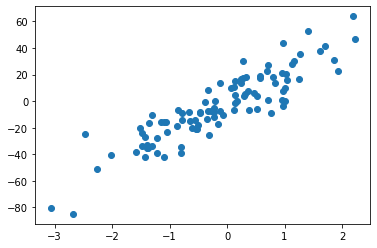

In [6]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

(100, 1)
(100,)


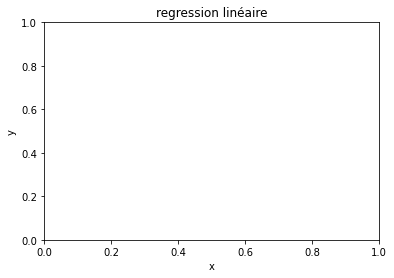

In [7]:
plt.title("regression linéaire")
plt.xlabel("x")
plt.ylabel("y")
print(x.shape)
print(y.shape)
# redimensionner y
y = y.reshape(y.shape[0], 1)


In [9]:
#matrice X 
X = np.hstack((x, np.ones(x.shape)))
X

array([[-0.51440019,  1.        ],
       [ 0.31699077,  1.        ],
       [-1.39827441,  1.        ],
       [-0.65235369,  1.        ],
       [ 0.35534057,  1.        ],
       [ 0.76887002,  1.        ],
       [-1.50989015,  1.        ],
       [-0.80842047,  1.        ],
       [ 1.40519567,  1.        ],
       [ 0.23929102,  1.        ],
       [-1.04094978,  1.        ],
       [-3.0722459 ,  1.        ],
       [ 0.37514825,  1.        ],
       [-1.14275201,  1.        ],
       [ 0.27849399,  1.        ],
       [-0.55606444,  1.        ],
       [ 0.97293652,  1.        ],
       [-0.13041331,  1.        ],
       [ 0.99945473,  1.        ],
       [-0.78097031,  1.        ],
       [ 0.72031356,  1.        ],
       [ 0.57831799,  1.        ],
       [-0.46904678,  1.        ],
       [ 0.95366408,  1.        ],
       [ 1.92993094,  1.        ],
       [ 0.71359789,  1.        ],
       [-1.2123693 ,  1.        ],
       [ 0.12448119,  1.        ],
       [ 0.47302812,

In [10]:
theta = np.random.randn(2, 1) #generer des nbr aléatoire
theta

array([[-1.36444172],
       [-0.44843132]])

In [11]:
def model(X, theta):
    return X.dot(theta)

Text(0, 0.5, 'y')

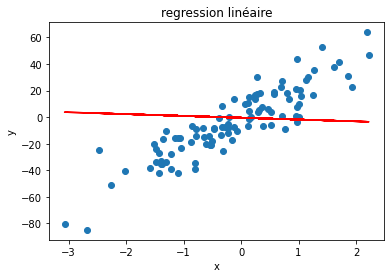

In [12]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')
plt.title("regression linéaire")
plt.xlabel("x")
plt.ylabel("y")


In [13]:
def cost_function(X, y, theta):
    m = len(y) 
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [14]:
cost_function(X, y, theta)

373.2062296202368

In [15]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [16]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [17]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [18]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[21.44443429],
       [-1.02356859]])

Text(0, 0.5, 'y')

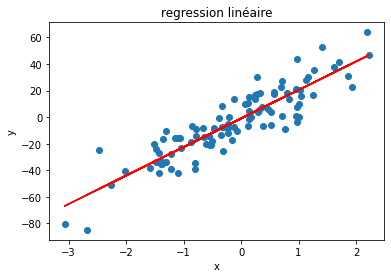

In [19]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.title("regression linéaire")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

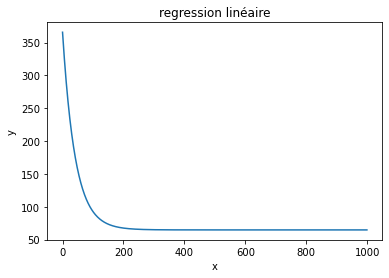

In [20]:
plt.plot(range(n_iterations), cost_history)
plt.title("regression linéaire")
plt.xlabel("x")
plt.ylabel("y")


In [21]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [22]:
coef_determination(y, predictions)

0.8048573779318376